## 实验目的
## 理解并掌
握经典的聚类算法。
2. 能够基于聚类算法实现鸢尾花数据和城市数据的K-means聚类。
3. 能够举一反三，实现不同含量果汁饮料的聚类。

## 实验内容
复现K-means的案例iris。
对于给定的项目，自行编写程序，使用K-means算法实现经纬度的城市和不同含量果汁饮料的聚类。
## 实验步骤
###  1. 复现iris聚类
1.1 程序代码:

准确率: 0.091667


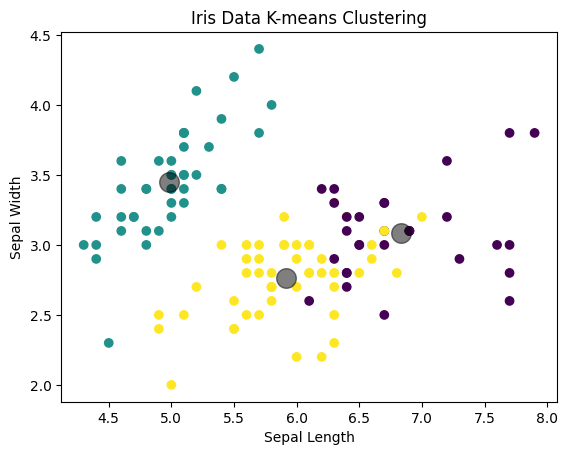

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics

# 加载数据集
iris = datasets.load_iris()
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris.data, iris.target, test_size=0.2)

# 配置模型
kmeans = KMeans(n_clusters=3)

# 训练模型
kmeans_fit = kmeans.fit(iris_X_train)

# 模型预测
y_predict = kmeans.predict(iris_X_train)

# 模型评估
score = metrics.accuracy_score(iris_y_train, kmeans.predict(iris_X_train))
print(f'准确率: {score:.6f}')

# 结果可视化
x1 = iris_X_train[:, 0]  # 鸢尾花花萼长度
y1 = iris_X_train[:, 1]  # 鸢尾花花萼宽度
plt.scatter(x1, y1, c=y_predict, cmap='viridis')  # 画每一条的位置

centers = kmeans.cluster_centers_  # 每个分类的中心点
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)  # 中心点
plt.title('Iris Data K-means Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


### 2. 使用K-means算法实现城市的聚类
2.1 程序代码:

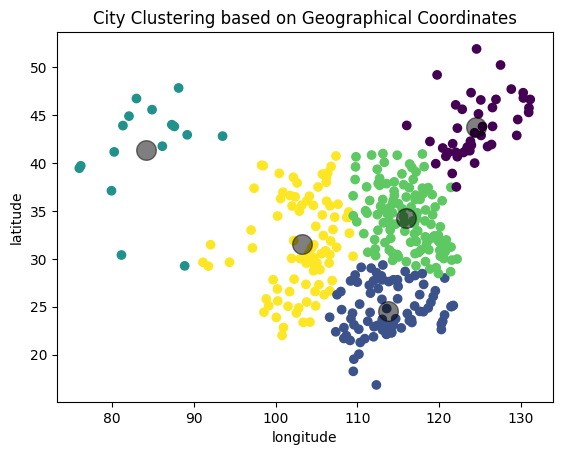

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 加载数据集
data = pd.read_csv('../data/china_cities.csv')
data.head()

# 数据预处理
city_coords = data[['东经', '北纬']]

# 配置模型
kmeans = KMeans(n_clusters=5)  # 这里假设我们要分为5个簇

# 训练模型
kmeans_fit = kmeans.fit(city_coords)

# 模型预测
city_labels = kmeans.predict(city_coords)

# 结果可视化
plt.scatter(city_coords['东经'], city_coords['北纬'], c=city_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.5)
plt.title('City Clustering based on Geographical Coordinates')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()


### 3. 使用K-means算法实现不同含量果汁饮料的聚类
3.1 程序代码:

Optimal k: 4


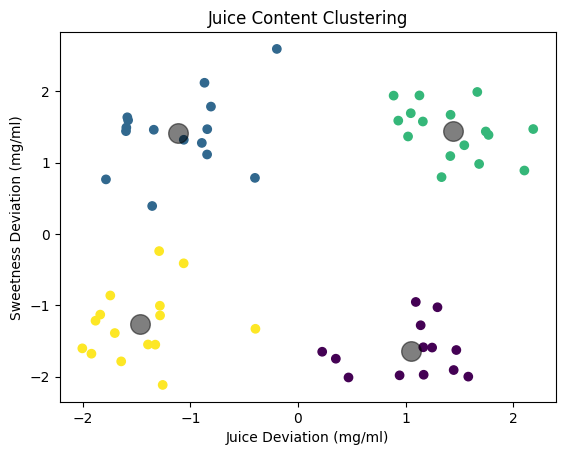

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

# 加载数据集
data = pd.read_csv('../data/juice_data.csv')
data.head()

# 样本数据转化
juice_sweet = data[['juice', 'sweet']]

# 确定k的取值范围
ch_scores = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(juice_sweet)
    ch_score = metrics.calinski_harabasz_score(juice_sweet, kmeans.labels_)
    ch_scores.append(ch_score)

# 选择最优k值
optimal_k = k_range[ch_scores.index(max(ch_scores))]
print(f'Optimal k: {optimal_k}')

# 配置模型
kmeans = KMeans(n_clusters=optimal_k)

# 训练模型
kmeans_fit = kmeans.fit(juice_sweet)

# 聚类结果
juice_labels = kmeans.predict(juice_sweet)

# 结果可视化
plt.scatter(juice_sweet['juice'], juice_sweet['sweet'], c=juice_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.5)
plt.title('Juice Content Clustering')
plt.xlabel('Juice Deviation (mg/ml)')
plt.ylabel('Sweetness Deviation (mg/ml)')
plt.show()
